# Load Dataset

In [36]:
import pandas as pd

# Load the dataset
mortality_dataset = pd.read_csv('./datasets/Weekly_Provisional_Counts_of_Deaths_by_State_and_Select_Causes__2020-2023_20250216.csv')
mortality_dataset_illinois = mortality_dataset[mortality_dataset['Jurisdiction of Occurrence'] == 'Illinois']
climate_dataset = pd.read_csv('./datasets/Climate datasets/Data Cleaning/Climate_weekly_data.csv')


# count number of rows in both and print
print("Number of rows in mortality dataset: ", len(mortality_dataset_illinois))
print("Number of rows in climate dataset: ", len(climate_dataset))

climate_dataset.columns

Number of rows in mortality dataset:  194
Number of rows in climate dataset:  196


Index(['Week_Ending_Date', 'AWND', 'DAPR', 'MDPR', 'PRCP', 'SNOW', 'SNWD',
       'TAVG', 'TMAX', 'TMIN', 'TOBS', 'WT01', 'WT02', 'WT03', 'WT04', 'WT05',
       'WT06', 'WT08', 'WT11'],
      dtype='object')

# Data Pre-Processing

In [37]:
# Code for cleaning individiual datasets
relevent_mortality_columns = ['Jurisdiction of Occurrence', 'MMWR Year', 'MMWR Week',
       'Week Ending Date', 'All Cause', 'Natural Cause',
       'Septicemia (A40-A41)', 'Malignant neoplasms (C00-C97)',
       'Diabetes mellitus (E10-E14)', 'Alzheimer disease (G30)',
       'Influenza and pneumonia (J09-J18)',
       'Chronic lower respiratory diseases (J40-J47)',
       'Other diseases of respiratory system (J00-J06,J30-J39,J67,J70-J98)',
       'Nephritis, nephrotic syndrome and nephrosis (N00-N07,N17-N19,N25-N27)',
       'Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified (R00-R99)',
       'Diseases of heart (I00-I09,I11,I13,I20-I51)',
       'Cerebrovascular diseases (I60-I69)',
       'COVID-19 (U071, Multiple Cause of Death)',
       'COVID-19 (U071, Underlying Cause of Death)']
# Drop irrelevant columns from mortality dataset
mortality_dataset_illinois = mortality_dataset_illinois[relevent_mortality_columns]

relevant_climate_columns = ['Week_Ending_Date', 'AWND', 'DAPR', 'MDPR', 'PRCP', 'SNOW', 'SNWD',
       'TAVG', 'TMAX', 'TMIN', 'TOBS']

column_map = {
    'Week_Ending_Date': 'Week Ending Date',
    'AWND': 'Average Wind Speed (m/s)',
    'DAPR': 'Number of days included in the multiday precipitation total',
    'MDPR': 'Multiday precipitation total (mm)',
    'PRCP': 'Precipitation (mm)',
    'SNOW': 'Snowfall (cm)',
    'SNWD': 'Snow Depth (cm)',
    'TAVG': 'Average Temperature (C)',
    'TMAX': 'Maximum Temperature (C)',
    'TMIN': 'Minimum Temperature (C)',
    'TOBS': 'Temperature Observed (C)'
}

# Drop irrelevant columns from climate dataset
climate_dataset = climate_dataset[relevant_climate_columns]
# Rename columns in climate dataset
climate_dataset.rename(columns=column_map, inplace=True)

In [38]:
# Merge Columns
mortality_dataset_illinois['Week Ending Date'] = pd.to_datetime(mortality_dataset_illinois['Week Ending Date'])
climate_dataset['Week Ending Date'] = pd.to_datetime(climate_dataset['Week Ending Date'])
merged_dataset = pd.merge(mortality_dataset_illinois, climate_dataset, on='Week Ending Date', how='inner')

merged_dataset.head()

,Jurisdiction of Occurrence,MMWR Year,MMWR Week,Week Ending Date,All Cause,Natural Cause,Septicemia (A40-A41),Malignant neoplasms (C00-C97),Diabetes mellitus (E10-E14),Alzheimer disease (G30),...,Average Wind Speed (m/s),Number of days included in the multiday precipitation total,Multiday precipitation total (mm),Precipitation (mm),Snowfall (cm),Snow Depth (cm),Average Temperature (C),Maximum Temperature (C),Minimum Temperature (C),Temperature Observed (C)
0,Illinois,2020,1,2020-01-04,2191,2007,29.0,427.0,57.0,74.0,...,9.210750,6.612903,0.621724,0.020785,0.148594,0.318916,37.781250,43.290650,28.983640,33.682864
1,Illinois,2020,2,2020-01-11,2252,2080,47.0,477.0,65.0,93.0,...,11.422643,5.620000,0.729583,0.311628,0.010213,0.042903,37.642857,45.340987,26.728853,32.982684
2,Illinois,2020,3,2020-01-18,2231,2065,30.0,476.0,59.0,94.0,...,10.194357,3.543860,1.450536,0.161805,0.358374,0.545935,31.714286,37.518648,22.459837,28.558309
3,Illinois,2020,4,2020-01-25,2199,2033,33.0,447.0,72.0,87.0,...,9.213000,3.532468,0.620533,0.080188,0.324857,1.473982,25.700000,30.947248,17.700000,22.355301
4,Illinois,2020,5,2020-02-01,2137,1984,33.0,450.0,61.0,76.0,...,5.445500,4.186441,0.429825,0.014698,0.062847,1.513662,32.714286,34.669309,27.444824,29.648649


# Correlation

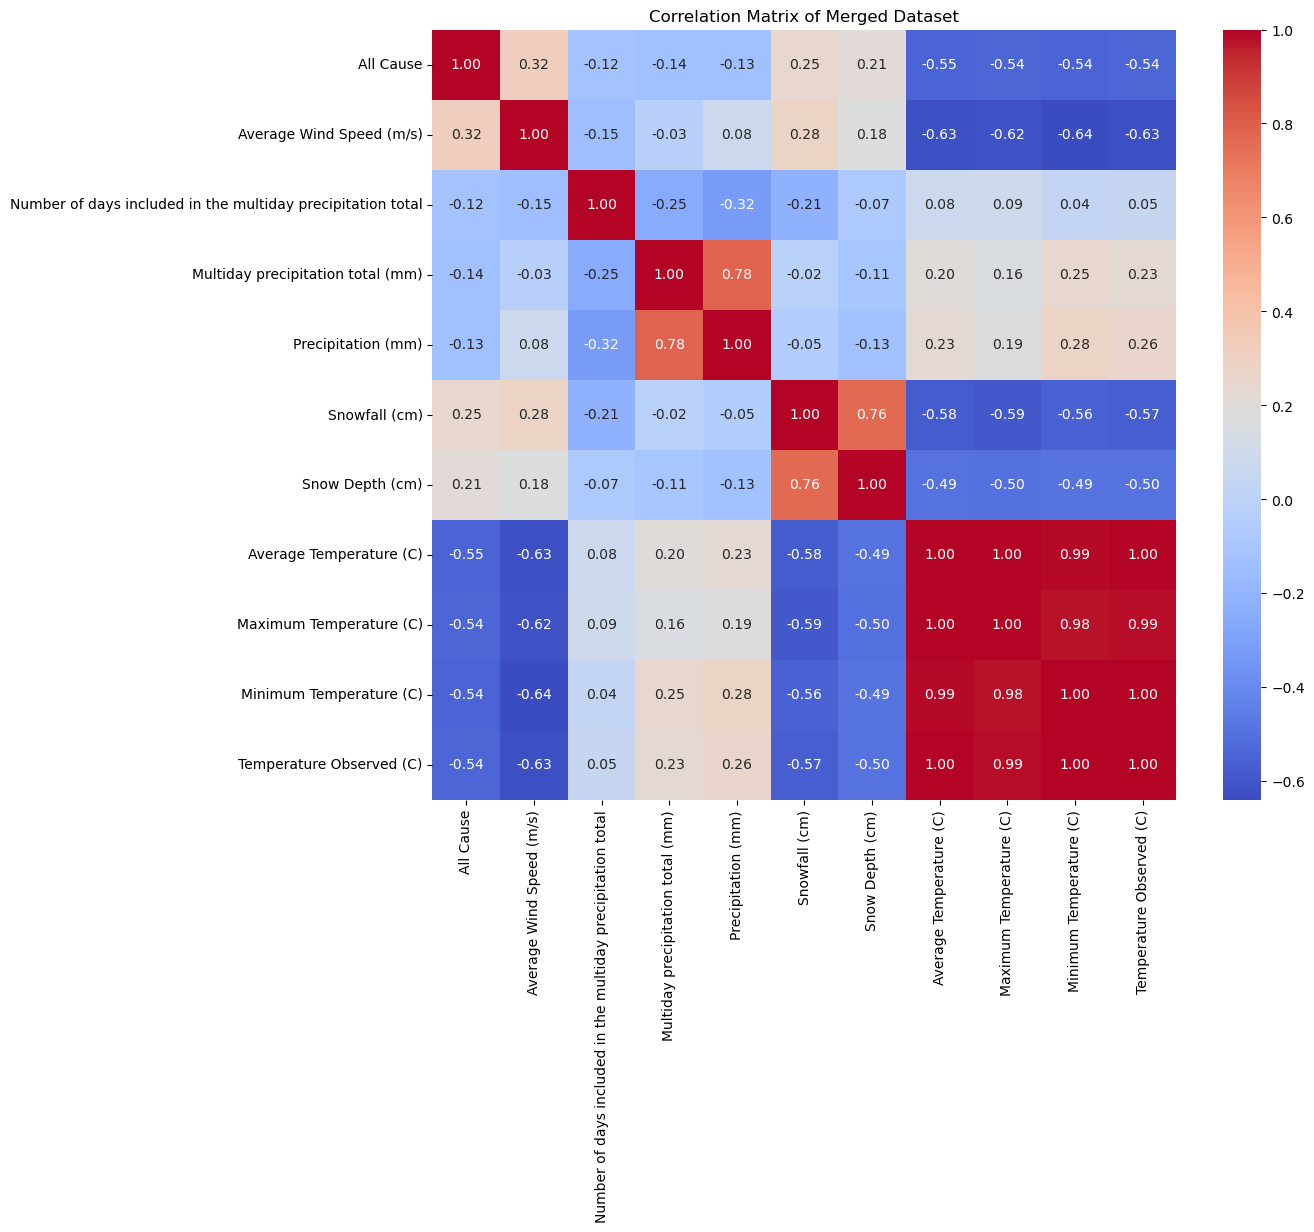

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt


# Compute the correlation matrix for numeric columns only and only All Cause
columns = ['All Cause', 'Average Wind Speed (m/s)', 'Number of days included in the multiday precipitation total',
           'Multiday precipitation total (mm)', 'Precipitation (mm)', 'Snowfall (cm)', 'Snow Depth (cm)',
           'Average Temperature (C)', 'Maximum Temperature (C)', 'Minimum Temperature (C)', 'Temperature Observed (C)']
correlation_matrix = merged_dataset[columns].corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix of Merged Dataset")
plt.show()

# Linear Model 

Mean Squared Error: 76869.57005523625
R-squared: 0.11086292539526676


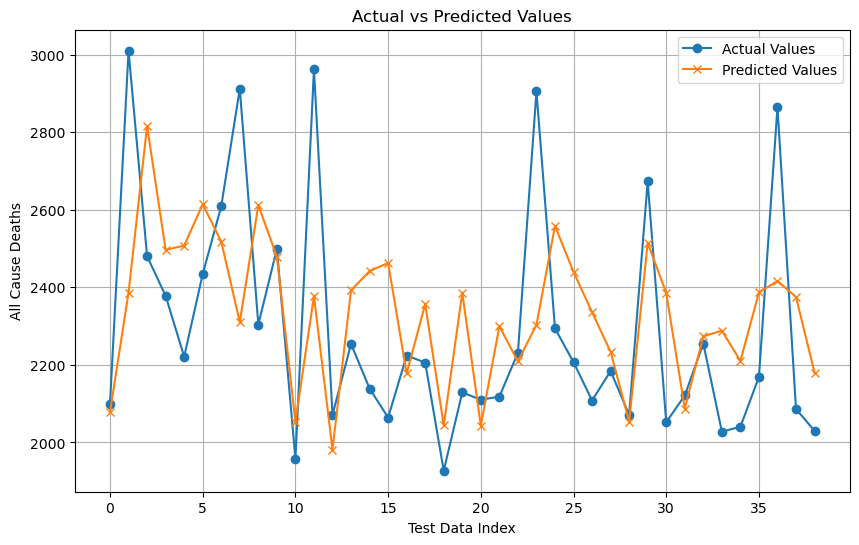

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define predictors and label
predictors = ['Average Wind Speed (m/s)', 
              'Number of days included in the multiday precipitation total', 
              ' Multiday precipitation total (mm)', 
              'Precipitation (mm)', 
              'Snowfall (cm)', 
              'Snow Depth (cm)', 
              'Average Temperature (C)', 
              'Maximum Temperature (C)', 
              'Minimum Temperature (C)', 
              'Temperature Observed (C)']
label = 'All Cause'

# Split the data into training and testing sets
X = merged_dataset[predictors]
y = merged_dataset[label]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Make predictions
y_pred = linear_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

import matplotlib.pyplot as plt

# Visualize the predictions
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Values', marker='o')
plt.plot(y_pred, label='Predicted Values', marker='x')
plt.title('Actual vs Predicted Values')
plt.xlabel('Test Data Index')
plt.ylabel('All Cause Deaths')
plt.legend()
plt.grid()
plt.show()

# ARIMA Model to forecast Death Count

23:38:21 - cmdstanpy - INFO - Chain [1] start processing
23:38:21 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\mohi2\.conda\envs\prompter\lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\mohi2\.conda\envs\prompter\lib\site-packages\prophet\plot.py:397: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  artists += ax.plot(df_y['ds'].dt.to_pydatetime(), seas[name], ls='-',
c:\Users\mohi2\.conda\envs\prompter\lib\site-packages\prophet\plot.py:401: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is 

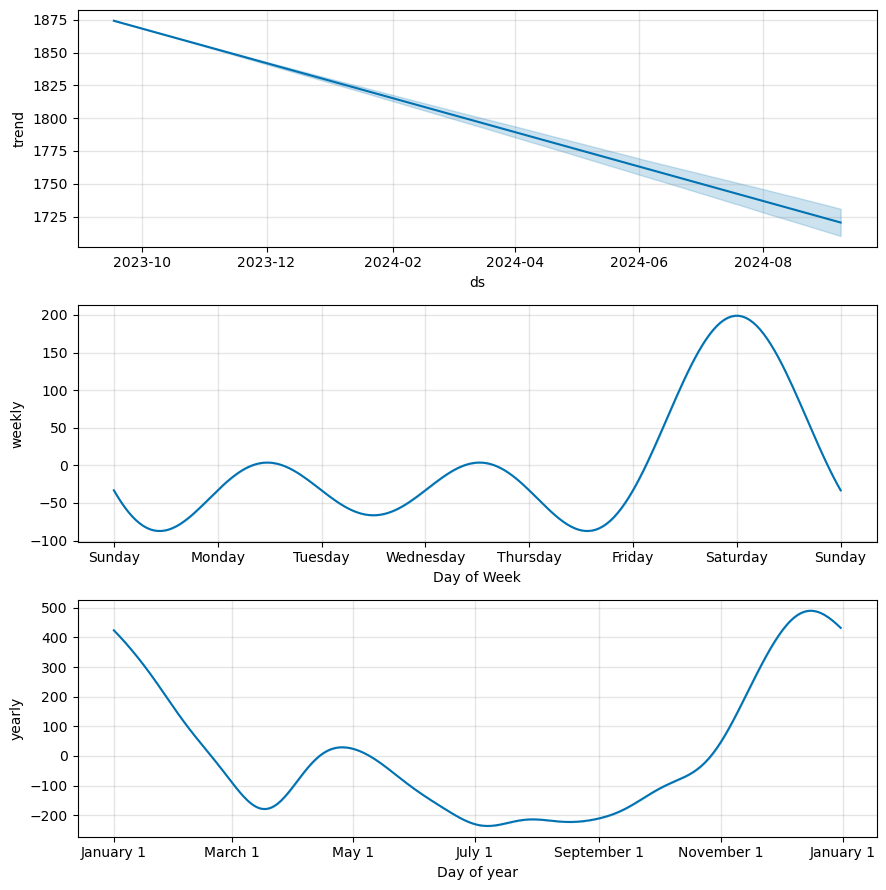

Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.
  0%|          | 0/32 [00:00<?, ?it/s]23:38:22 - cmdstanpy - INFO - Chain [1] start processing
23:38:23 - cmdstanpy - INFO - Chain [1] done processing
  3%|▎         | 1/32 [00:00<00:14,  2.09it/s]23:38:23 - cmdstanpy - INFO - Chain [1] start processing
23:38:23 - cmdstanpy - INFO - Chain [1] done processing
  6%|▋         | 2/32 [00:01<00:15,  1.95it/s]23:38:23 - cmdstanpy - INFO - Chain [1] start processing
23:38:24 - cmdstanpy - INFO - Chain [1] done processing
  9%|▉         | 3/32 [00:01<00:16,  1.78it/s]23:38:24 - cmdstanpy - INFO - Chain [1] start processing
23:38:24 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 4/32 [00:02<00:16,  1.66it/s]23:38:25 - cmdstanpy - INFO - Chain [1] start processing
23:38:25 - cmdstanpy - INFO - Chain [1] done processing
 16%|█▌        | 5/32 [00:03<00:18,  1.48it/s]23:38:25 - cmdstanpy - INFO - Chain [1] start processing
23:38:

  horizon           mse        rmse         mae      mape     mdape     smape  \
0  3 days  33639.983961  183.412061  142.756929  0.064749  0.052129  0.063530   
1  4 days  44336.444233  210.562210  177.328269  0.080185  0.065304  0.078008   
2  5 days  61255.696595  247.498882  204.858828  0.089461  0.083378  0.090950   
3  6 days  78071.822171  279.413354  241.539118  0.105445  0.095611  0.103976   
4  7 days  91288.286444  302.139515  257.780688  0.109687  0.095611  0.111954   

   coverage  
0  0.784615  
1  0.707692  
2  0.615385  
3  0.492308  
4  0.461538  


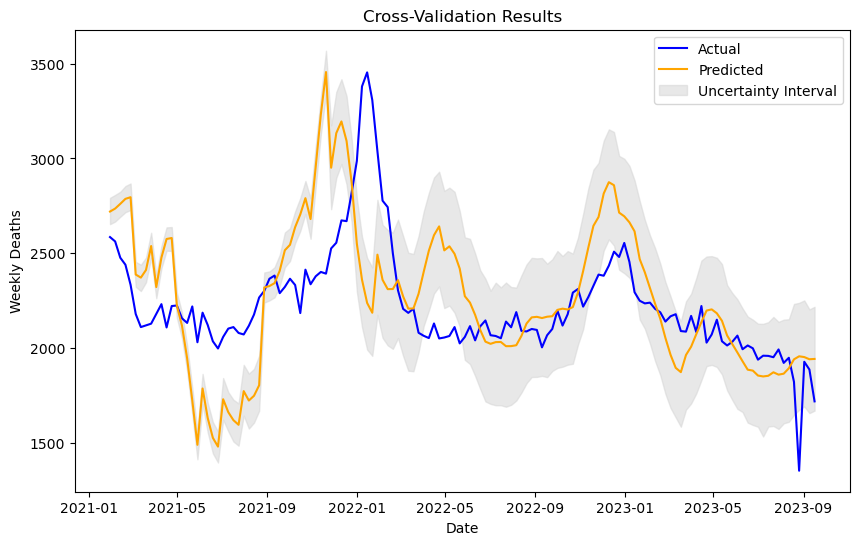

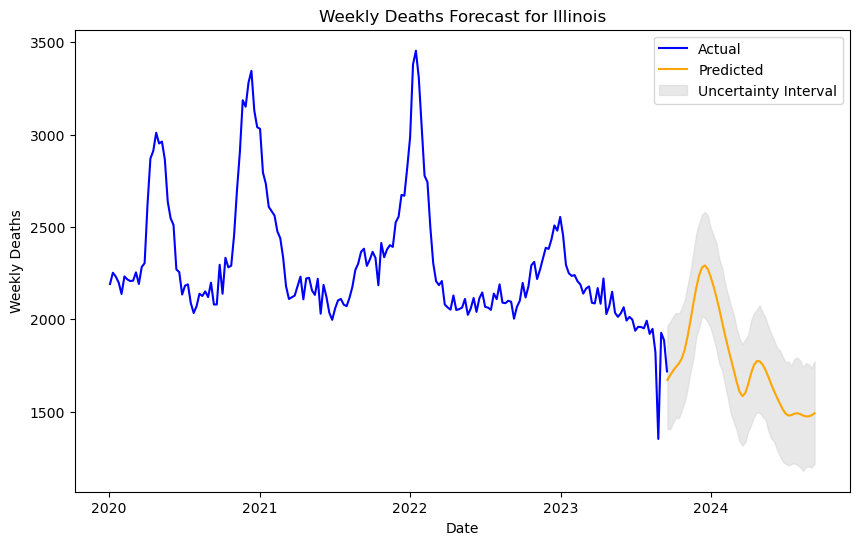

In [ ]:
from prophet import Prophet
from datetime import datetime
from prophet.plot import plot_plotly
from prophet.diagnostics import cross_validation, performance_metrics


# Convert the date column to datetime format
mortality_dataset_illinois['Week Ending Date'] = pd.to_datetime(mortality_dataset_illinois['Week Ending Date'], errors='coerce')
mortality_dataset_illinois.dropna(subset=['Week Ending Date'], inplace=True)  # Drop rows with invalid dates
mortality_dataset_illinois.rename(columns={'Week Ending Date': 'ds', 'All Cause': 'y'}, inplace=True)
mortality_dataset_illinois = mortality_dataset_illinois[['ds', 'y']].dropna()
mortality_dataset_illinois = mortality_dataset_illinois[(mortality_dataset_illinois['y'] > 0) & (mortality_dataset_illinois['y'] < 10000)]  # Filter rows with valid 'y' values

# Create a Prophet model
model = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=False)
model.fit(mortality_dataset_illinois)

# Create a future dataframe for predictions
future = model.make_future_dataframe(periods=52, freq='W')
future = future[future['ds'] > mortality_dataset_illinois['ds'].max()]
future = future[future['ds'] < mortality_dataset_illinois['ds'].max() + pd.DateOffset(weeks=52)]

# Make predictions
forecast = model.predict(future)

# Plot the forecast components
fig2 = model.plot_components(forecast)
plt.show()
# Cross-validation
df_cv = cross_validation(model, initial='365 days', period='30 days', horizon='30 days')
df_p = performance_metrics(df_cv)
print(df_p.head())
# Plot the cross-validation results
plt.figure(figsize=(10, 6))
plt.plot(df_cv['ds'], df_cv['y'], label='Actual', color='blue')
plt.plot(df_cv['ds'], df_cv['yhat'], label='Predicted', color='orange')
plt.fill_between(df_cv['ds'], df_cv['yhat_lower'], df_cv['yhat_upper'], color='lightgray', alpha=0.5, label='Uncertainty Interval')
plt.xlabel('Date')
plt.ylabel('Weekly Deaths')
plt.title('Cross-Validation Results')
plt.legend()
plt.show()

# Plot the forecast with uncertainty intervals
plt.figure(figsize=(10, 6))
plt.plot(mortality_dataset_illinois['ds'], mortality_dataset_illinois['y'], label='Actual', color='blue')
plt.plot(forecast['ds'], forecast['yhat'], label='Predicted', color='orange')
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='lightgray', alpha=0.5, label='Uncertainty Interval')
plt.xlabel('Date')
plt.ylabel('Weekly Deaths')
plt.title('Weekly Deaths Forecast for Illinois')
plt.legend()
plt.show()